In [30]:
import tensorflow as tf
import pandas as pd
physical_devices = tf.config.experimental.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (20,10)

In [61]:
df = pd.read_csv('ECG5000.csv')

In [62]:
df['0'].value_counts()

1.0    2919
2.0    1767
4.0     194
3.0      96
5.0      24
Name: 0, dtype: int64

In [33]:
train_data, test_data, train_labels, test_labels = train_test_split(df.values, df['0'].values, test_size=0.2, random_state=111)

In [34]:
train_data.shape

(4000, 141)

In [54]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(train_data)

In [55]:
train_data_scaled = data_scaled.transform(train_data)
test_data_scaled = data_scaled.transform(test_data)

In [37]:
normal_train_data= pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_train_data = pd.DataFrame(train_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

In [39]:
normal_test_data= pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 == 0').values[:,1:]
anomaly_test_data = pd.DataFrame(test_data_scaled).add_prefix('c').query('c0 > 0').values[:,1:]

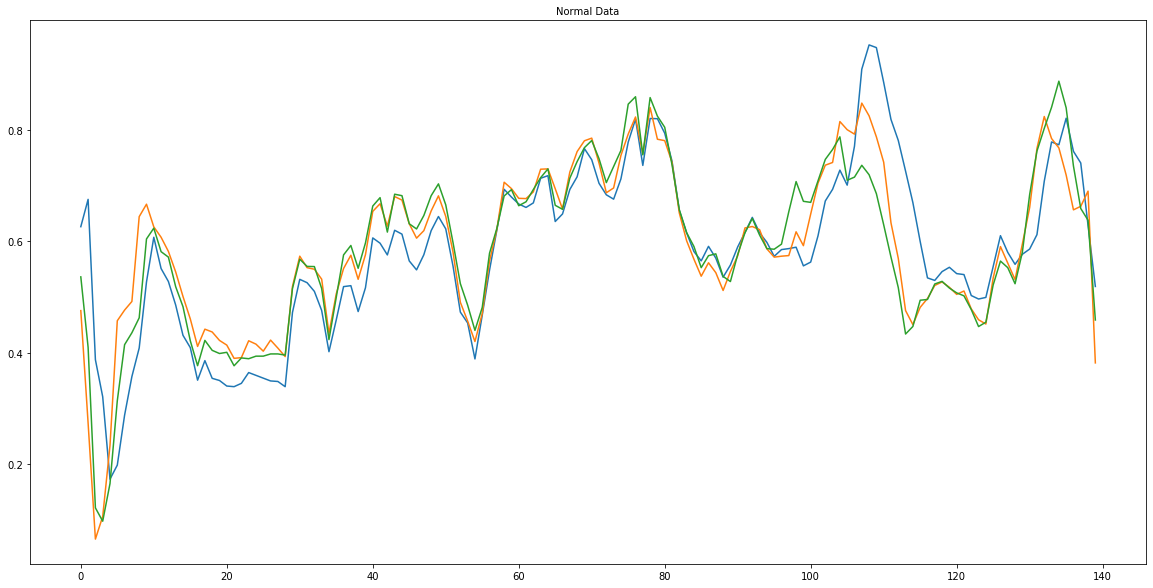

In [40]:
plt.plot(normal_train_data[234])
plt.plot(normal_train_data[342])
plt.plot(normal_train_data[62])
plt.title('Normal Data')
plt.show()

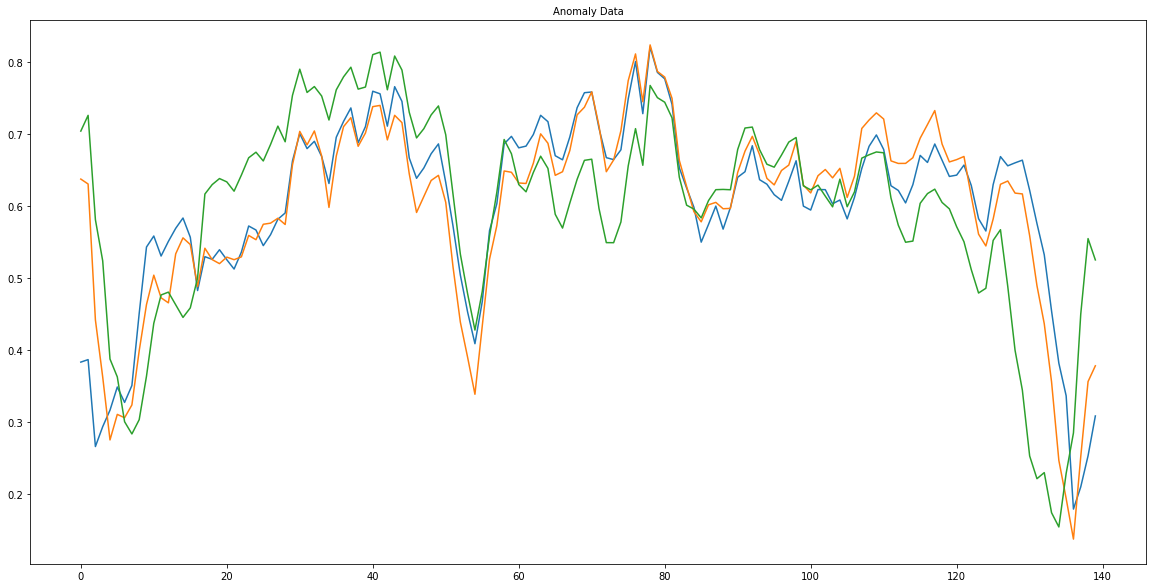

In [41]:
plt.plot(anomaly_train_data[340])
plt.plot(anomaly_train_data[13])
plt.plot(anomaly_train_data[123])
plt.title('Anomaly Data')
plt.show()

In [42]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation="relu", input_dim= normal_train_data.shape[1]))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(16, activation="relu")) 
model.add(tf.keras.layers.Dense(8, activation="relu")) 
model.add(tf.keras.layers.Dense(16, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(140, activation="sigmoid"))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                9024      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                2

In [43]:
model.fit(normal_train_data, normal_train_data, 
          epochs=1000,
          batch_size=128,
          validation_data=(train_data_scaled[:,1:], train_data_scaled[:,1:]),
          shuffle=True)

Epoch 1/1000
19/19 [==============================] - 0s 10ms/step - loss: 0.1169 - val_loss: 0.0977
Epoch 2/1000
19/19 [==============================] - 0s 6ms/step - loss: 0.0693 - val_loss: 0.0800
Epoch 3/1000
19/19 [==============================] - 0s 6ms/step - loss: 0.0521 - val_loss: 0.0757
Epoch 4/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0481 - val_loss: 0.0742
Epoch 5/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0471 - val_loss: 0.0729
Epoch 6/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0461 - val_loss: 0.0701
Epoch 7/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0436 - val_loss: 0.0666
Epoch 8/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0404 - val_loss: 0.0646
Epoch 9/1000
19/19 [==============================] - 0s 6ms/step - loss: 0.0386 - val_loss: 0.0642
Epoch 10/1000
19/19 [==============================] - 0s 6ms/step - loss: 0.0378 - val_loss: 0.063

19/19 [==============================] - 0s 5ms/step - loss: 0.0237 - val_loss: 0.0474
Epoch 163/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0237 - val_loss: 0.0463
Epoch 164/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.0468
Epoch 165/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.0469
Epoch 166/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.0466
Epoch 167/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0239 - val_loss: 0.0465
Epoch 168/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0237 - val_loss: 0.0465
Epoch 169/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0236 - val_loss: 0.0455
Epoch 170/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0237 - val_loss: 0.0470
Epoch 171/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0235 - val_loss: 0.

19/19 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.0446
Epoch 323/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.0437
Epoch 324/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0212 - val_loss: 0.0436
Epoch 325/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0212 - val_loss: 0.0438
Epoch 326/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.0430
Epoch 327/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.0429
Epoch 328/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.0437
Epoch 329/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.0424
Epoch 330/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0211 - val_loss: 0.0435
Epoch 331/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0210 - val_loss: 0.

19/19 [==============================] - 0s 7ms/step - loss: 0.0203 - val_loss: 0.0421
Epoch 483/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0203 - val_loss: 0.0419
Epoch 484/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0203 - val_loss: 0.0422
Epoch 485/1000
19/19 [==============================] - 0s 6ms/step - loss: 0.0203 - val_loss: 0.0418
Epoch 486/1000
19/19 [==============================] - 0s 6ms/step - loss: 0.0204 - val_loss: 0.0421
Epoch 487/1000
19/19 [==============================] - 0s 8ms/step - loss: 0.0204 - val_loss: 0.0422
Epoch 488/1000
19/19 [==============================] - 0s 6ms/step - loss: 0.0203 - val_loss: 0.0414
Epoch 489/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0204 - val_loss: 0.0420
Epoch 490/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0203 - val_loss: 0.0414
Epoch 491/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0204 - val_loss: 0.

19/19 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.0429
Epoch 643/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0429
Epoch 644/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.0429
Epoch 645/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0426
Epoch 646/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0431
Epoch 647/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0186 - val_loss: 0.0425
Epoch 648/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0427
Epoch 649/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0431
Epoch 650/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0185 - val_loss: 0.0428
Epoch 651/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0184 - val_loss: 0.

19/19 [==============================] - 0s 8ms/step - loss: 0.0178 - val_loss: 0.0418
Epoch 803/1000
19/19 [==============================] - 0s 7ms/step - loss: 0.0178 - val_loss: 0.0423
Epoch 804/1000
19/19 [==============================] - 0s 6ms/step - loss: 0.0177 - val_loss: 0.0423
Epoch 805/1000
19/19 [==============================] - 0s 6ms/step - loss: 0.0178 - val_loss: 0.0421
Epoch 806/1000
19/19 [==============================] - 0s 6ms/step - loss: 0.0178 - val_loss: 0.0423
Epoch 807/1000
19/19 [==============================] - 0s 6ms/step - loss: 0.0178 - val_loss: 0.0426
Epoch 808/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0179 - val_loss: 0.0426
Epoch 809/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0179 - val_loss: 0.0426
Epoch 810/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0179 - val_loss: 0.0427
Epoch 811/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0178 - val_loss: 0.

19/19 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.0428
Epoch 963/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.0430
Epoch 964/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0175 - val_loss: 0.0427
Epoch 965/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0175 - val_loss: 0.0428
Epoch 966/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.0429
Epoch 967/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.0427
Epoch 968/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.0429
Epoch 969/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0175 - val_loss: 0.0429
Epoch 970/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.0428
Epoch 971/1000
19/19 [==============================] - 0s 5ms/step - loss: 0.0174 - val_loss: 0.

In [44]:
reconstruction_anomaly_loss = model.predict(anomaly_test_data)
anomaly_loss = tf.keras.losses.mae(reconstruction_anomaly_loss, anomaly_test_data)

In [45]:
reconstruction_normal_loss = model.predict(normal_test_data)
normal_loss = tf.keras.losses.mae(reconstruction_normal_loss, normal_test_data)

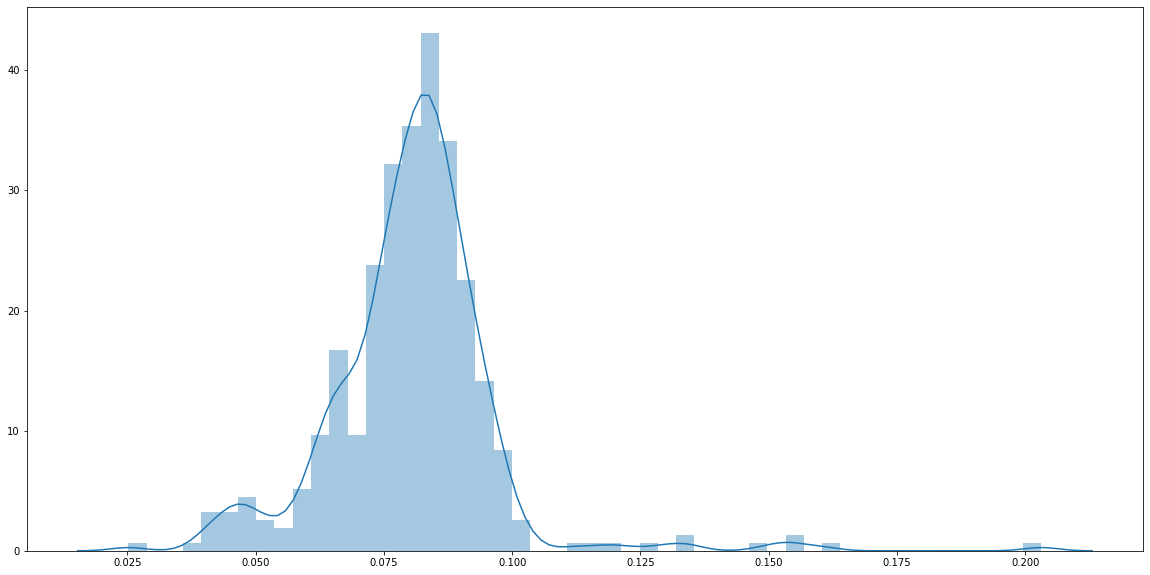

In [46]:
sns.distplot(anomaly_loss, bins=50);

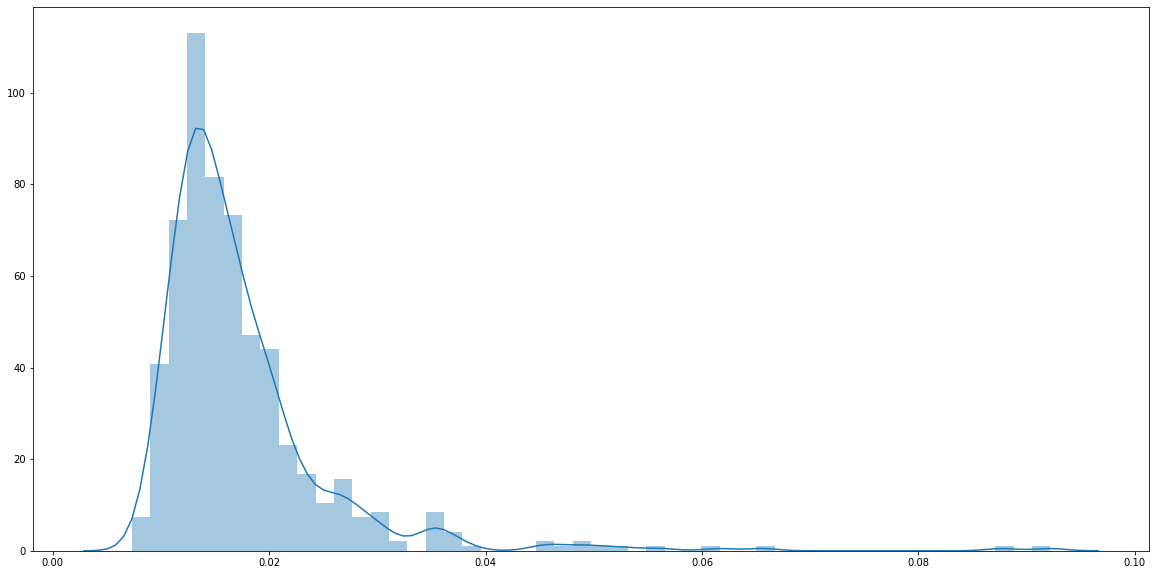

In [47]:
sns.distplot(normal_loss, bins= 50)